In [170]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [171]:
from torchvision.transforms import ToTensor
from torchvision.datasets import CIFAR10

dataset = CIFAR10(root='~/data', download=True, transform=ToTensor())

Files already downloaded and verified


In [172]:
from flexfl.data.sampler import FederatedSampler

fed_sampler = FederatedSampler(dataset=dataset, num_clients=5, sample_size_non_iidness='medium', target_non_iidness='medium')
fed_sampler.total_samples

43045

In [173]:
[len(fed_sampler.clients[client_id]) for client_id in range(5)]

[7570, 12905, 15933, 4151, 2486]

In [174]:
from torch.utils.data import DataLoader

# Count class distribution per site in a dataframe
class_counting = {client_id: [0] * 10 for client_id in range(5)}
for client_id in range(5):
    loader = DataLoader(fed_sampler.clients[client_id], batch_size=1, shuffle=False)
    for _, y in loader:
        for y_i in y:
            class_counting[client_id][y_i] += 1
class_counting

{0: [507, 1021, 1395, 336, 1154, 443, 970, 298, 947, 499],
 1: [701, 3356, 960, 737, 1440, 614, 1501, 567, 1322, 1707],
 2: [485, 623, 1800, 1019, 2406, 976, 1889, 1547, 2731, 2457],
 3: [627, 0, 845, 819, 0, 660, 496, 582, 0, 122],
 4: [224, 0, 0, 629, 0, 795, 144, 479, 0, 215]}

<Axes: >

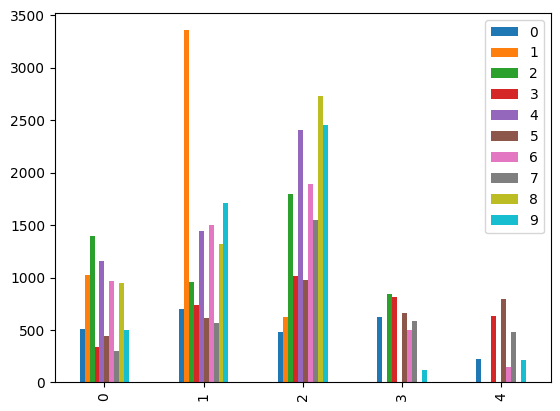

In [175]:
import pandas as pd

df = pd.DataFrame(class_counting).T
df.plot.bar()